In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape
#Did this change get picked up by git?

(70000,)

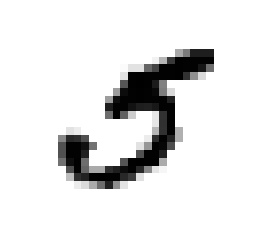

In [35]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000],y[60000:]


In [37]:
y_train.shape

(60000,)

In [38]:
#shuffle training set
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\g2sha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [39]:
y_train_5.shape

(60000,)

In [40]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [41]:
#Implementation of custom cross_validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    

0.91675
0.9612
0.95975


In [42]:
#Now a cross validated model using the cross_val_score method
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.91675,  0.9612 ,  0.95975])

In [43]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [44]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9086 ,  0.90985,  0.9105 ])

In [45]:
#Accuracy not always a good metric; need a confusion matrix

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52967,  1612],
       [ 1634,  3787]], dtype=int64)

In [48]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.70142619003519169

In [49]:
recall_score(y_train_5, y_train_pred)

0.69857959786017343

In [51]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.70000000000000007

In [52]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 219855.34803113])

In [53]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [54]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [67]:
y_score_upd = y_scores[:,1]

In [69]:
y_score_upd.shape

(60000,)

In [71]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_score_upd)

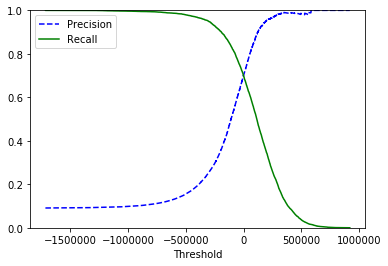

In [72]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [73]:
y_train_pred_90 = (y_score_upd > 70000)

In [74]:
precision_score(y_train_5, y_train_pred_90)

0.82389773023741197

In [75]:
recall_score(y_train_5, y_train_pred_90)

0.58254934513927314

#ROC, or receiver operating characteristic curve plots sensitivity(recall) against 1-specificity:
#Therefore ROC plots the true positive rate(recall), against the false positive rate. 
#The false positive rate is the ratio of the negative instances 
#which are incorrectly classified as positive = 1-true negative rate. true negative rate = specificity

In [76]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_score_upd)

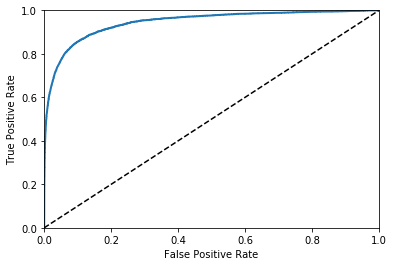

In [80]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_score_upd)

0.94486187219418871

In [82]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


In [83]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

C:\Users\g2sha\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	center right
	upper center
	right
	center left
	best
	lower left
	lower center
	center
	upper right
	lower right
	upper left

  six.iterkeys(self.codes))))


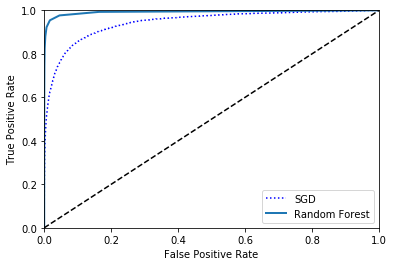

In [86]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [87]:
roc_auc_score(y_train_5, y_scores_forest)

0.99260975898088688

In [89]:
y_scores_forest

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [90]:
#One vs all(OVA) or one vs the rest will train 10 binary classifiers for each digit then gets the decision score for each 
#classifier. The highest decision score classifier is selected 
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [91]:
#If you want to review decision scores
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores


array([[-177670.09625196, -350825.08226902, -377683.76003777,
         -72255.99141   , -334952.54252335,  219855.34803113,
        -771793.39123167, -263271.5677536 , -657042.44313501,
        -730663.91271748]])

In [92]:
np.argmax(some_digit_scores)

5

In [93]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [95]:
sgd_clf.classes_[5]

5.0

In [96]:
#There is a class which can be used to perform the onevsone or onevsrest
#For one vs rest use OneVsRestClassifier

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))


C:\Users\g2sha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [97]:
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [98]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [99]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0.1,  0.2,  0. ,  0.6,  0. ,  0. ,  0. ,  0. ]])

In [100]:
len(ovo_clf.estimators_)

45

In [101]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.8384823 ,  0.8760938 ,  0.81687253])

In [102]:
#the 3 test folds give an accuracy over 80%. Standardize the data to improve results
#As seen below, by standardizing the data, the accuracy has improved
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([ 0.90741852,  0.91294565,  0.90833625])

In [103]:
#Confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5727,    2,   25,   10,   11,   50,   44,   10,   40,    4],
       [   2, 6455,   47,   24,    5,   39,    7,    9,  143,   11],
       [  55,   32, 5329,   96,   75,   28,   93,   59,  173,   18],
       [  49,   43,  134, 5349,    1,  230,   34,   54,  145,   92],
       [  23,   28,   39,   12, 5378,   10,   44,   31,   87,  190],
       [  75,   40,   34,  190,   78, 4586,  109,   24,  185,  100],
       [  31,   24,   54,    2,   44,   92, 5612,    6,   53,    0],
       [  23,   20,   73,   33,   55,   10,    4, 5802,   14,  231],
       [  54,  139,   67,  142,   13,  153,   54,   24, 5066,  139],
       [  39,   33,   30,   93,  149,   34,    2,  208,   91, 5270]], dtype=int64)

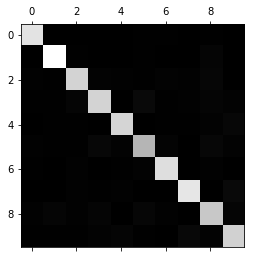

In [105]:
#Plot of the confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

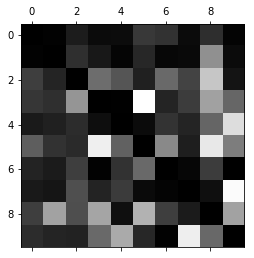

In [107]:
#In order to classify the errors for each digit a visual representation like this can help:
row_sums = conf_mx.sum(axis = 1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
#Fill diagonals with 0 and keep only errors and plot
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#Darker images represent less classification error than the lighter ones

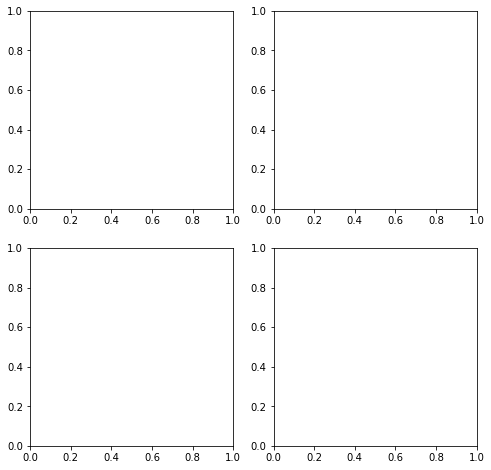

In [109]:
#Analyze individual errors on 3&5
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_aa = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_aa = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

plt.figure(figsize=(8,8))
plt.subplot(221); #plt_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); #plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); #plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); #plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [110]:
#Multi label classification using k-nearest neighbor. This will output true or false for if response is large(>=7) or odd.
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [113]:
y_multilabel

array([[False, False],
       [False, False],
       [False, False],
       ..., 
       [False, False],
       [False,  True],
       [False, False]], dtype=bool)

In [114]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [121]:
len(X_train)

60000

In [122]:
#Multiout classification
import random as rnd
noise = rnd.randint(100,len(X_train))
noise = rnd.randint(100,len(X_test))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [124]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_digit]])
plot_digit(clean_digit)

ValueError: Found array with dim 3. Estimator expected <= 2.